In [2]:
# %load_ext autoreload
# %autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../../')

import src.viz

#sns.set(style="white", context="notebook")

First look at the entropy production of a single trajectory of size T = 1000, we want to see finite sample effect ! 

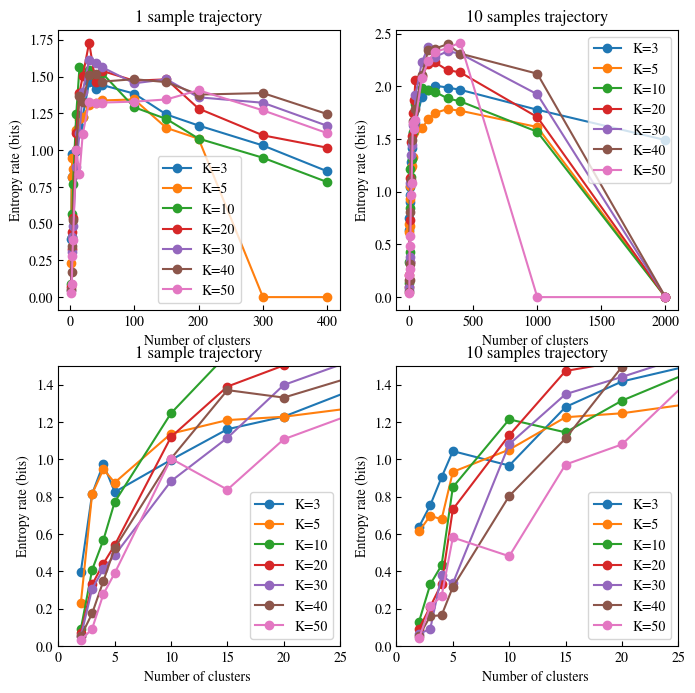

In [3]:
df = pd.read_csv('../../data/toy_model/interim/entropy_1sample.csv')
df1 = pd.read_csv('../../data/toy_model/interim/entropy_10sample.csv')
dfs = [df,df1]

title = ["1 sample trajectory", "10 samples trajectory"]

fig,ax = plt.subplots(ncols=2,nrows=2,figsize=(8,8))
for i in range(2):
    for j in range(2):
        for K, group in dfs[i].groupby("K"):
            ax[j,i].plot(group["n_clusters"], group["entropy_rate"], marker='o', label=f"K={K}")
        ax[j,i].set_xlabel("Number of clusters ")
        ax[j,i].set_ylabel("Entropy rate (bits)")
        ax[j,i].set_title(title[i])
        ax[j,i].legend()
for i in range(2):
    ax[1,i].set_xlim(0,25)
    ax[1,i].set_ylim(0,1.5)

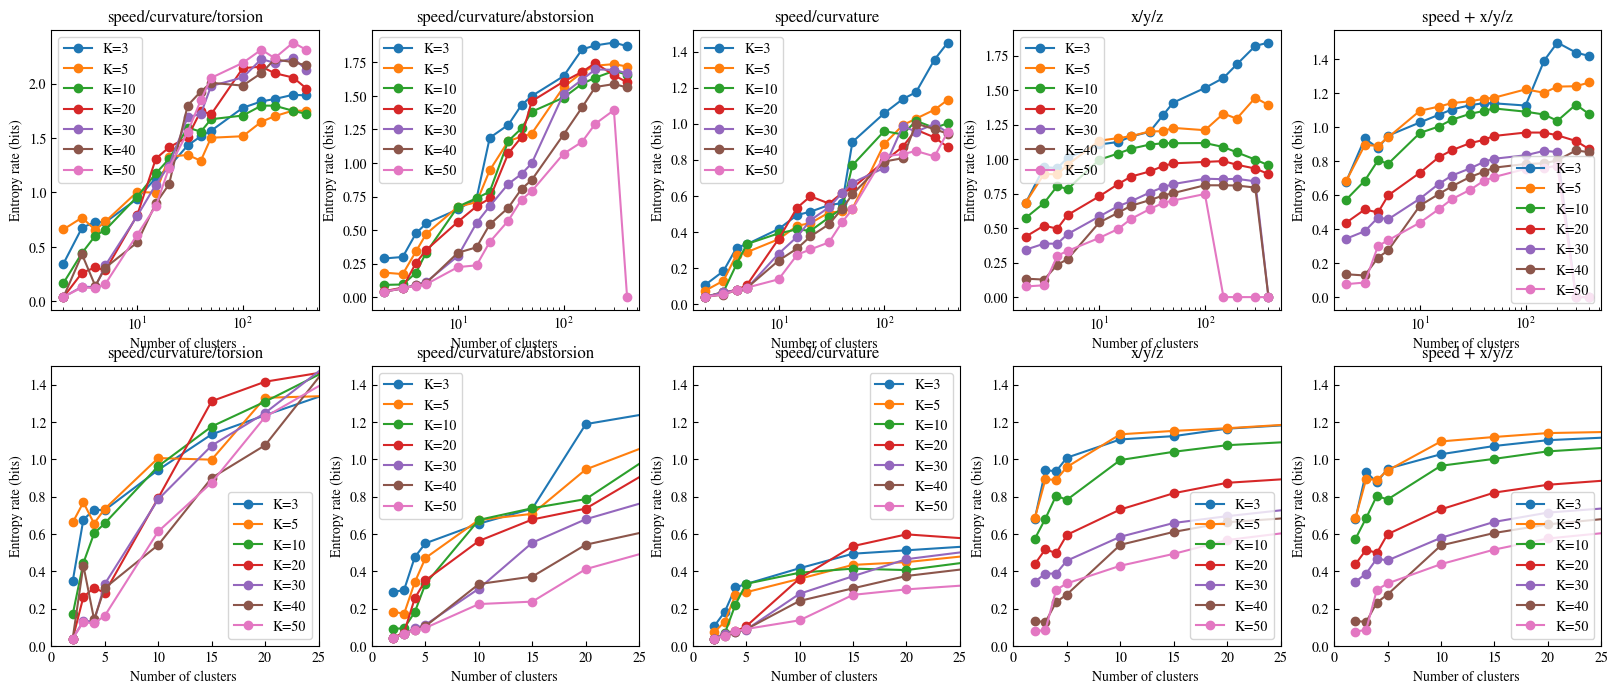

In [6]:
df = pd.read_csv('../../data/toy_model/interim/entropy_SCT.csv')
df1 = pd.read_csv('../../data/toy_model/interim/entropy_SCabsT.csv')
df2 = pd.read_csv('../../data/toy_model/interim/entropy_SC.csv')
df3 = pd.read_csv('../../data/toy_model/interim/entropy_XYZ.csv')
df4 = pd.read_csv('../../data/toy_model/interim/entropy_S_XYZ.csv')
dfs = [df,df1,df2,df3,df4]

title = ["speed/curvature/torsion", "speed/curvature/abstorsion","speed/curvature","x/y/z","speed + x/y/z"]

fig,ax = plt.subplots(ncols=5,nrows=2,figsize=(20,8))
for i in range(5):
    for j in range(2):
        for K, group in dfs[i].groupby("K"):
            ax[j,i].plot(group["n_clusters"], group["entropy_rate"], marker='o', label=f"K={K}")
        ax[j,i].set_xlabel("Number of clusters ")
        ax[j,i].set_ylabel("Entropy rate (bits)")
        ax[j,i].set_title(title[i])
        ax[j,i].legend()

for i in range(5):
    ax[1,i].set_xlim(0,25)
    ax[1,i].set_ylim(0,1.5)

    ax[0,i].set_xscale('log')

In [8]:
#df1 = pd.read_csv('../../data/toy_model/interim/entropy_scan_no_position.csv')
#df = pd.concat([df1,df2],ignore_index=True)

df = pd.read_csv('../../data/toy_model/interim/entropy.csv')
df2 = pd.read_csv('../../data/toy_model/interim/entropy_scan.csv')
df3 = pd.read_csv('../../data/toy_model/interim/entropy_scan_no_torsion_10samples.csv')
#df2 = pd.read_csv('../../data/toy_model/interim/entropy_scan_no_torsion_100_samples.csv')

Look at the entropy production using absolute value of the torsion angle.

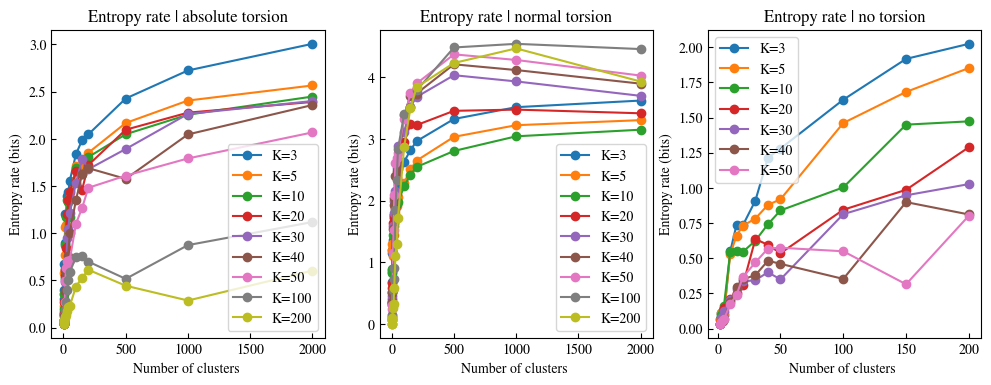

In [13]:
fig,ax = plt.subplots(ncols=3,figsize=(12,4))

for K, group in df.groupby("K"):
    ax[0].plot(group["n_clusters"], group["entropy_rate"], marker='o', label=f"K={K}")

ax[0].set_xlabel("Number of clusters ")
ax[0].set_ylabel("Entropy rate (bits)")
ax[0].set_title("Entropy rate | absolute torsion")
#ax[0].set_xlim(0,10)
#ax[0].set_ylim(0,1)
#ax[0].set_xscale('log')
ax[0].legend()


for K, group in df2.groupby("K"):
    ax[1].plot(group["n_clusters"], group["entropy_rate"], marker='o', label=f"K={K}")
ax[1].set_xlabel("Number of clusters ")
ax[1].set_ylabel("Entropy rate (bits)")
ax[1].set_title("Entropy rate | normal torsion")
ax[1].legend()

for K, group in df3.groupby("K"):
    ax[2].plot(group["n_clusters"], group["entropy_rate"], marker='o', label=f"K={K}")
ax[2].set_xlabel("Number of clusters ")
ax[2].set_ylabel("Entropy rate (bits)")
ax[2].set_title("Entropy rate | no torsion")
ax[2].legend()

#for i in range(3):
#    ax[i].set_xlim(0,25)
#    ax[i].set_ylim(0,1)


We select K = N_clusters = 30